vision - HW final

Mojtaba Aprouz - 40030594

1401/11/24

In [100]:
from skimage import io
import os
import cv2
import numpy as np
from math import sqrt
from skimage.feature import blob_dog, blob_log
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.morphology import binary_erosion as erosion
from skimage.measure import label


def blob_detector(image):
        # Connected-Components
        ret, bw_img = cv2.threshold(image_gray,0.033, 1, cv2.THRESH_BINARY)

        kernel= np.ones((3,3))
        erode=erosion(bw_img,kernel)
        labeled=label(erode, background=0, connectivity=2)
        unique, counts = np.unique(labeled, return_counts=True)

        # Laplacian of Gaussian
        log = blob_log(image_gray,min_sigma=2, max_sigma=3, num_sigma=10, threshold=0.007)
        # Difference of Gaussian
        dog = blob_dog(image_gray, max_sigma=3, threshold=.005)
        print(" Connected-Components : ",unique[-1],"        LOG : " , len(log),"                 DOG : " , len(dog))



        # Plot
        log[:, 2] = log[:, 2] * sqrt(2)
        dog[:, 2] = dog[:, 2] * sqrt(2)
        fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
        sub = axes.ravel()

        sub[0].set_title('Connected Components')
        sub[0].imshow(erode)
        sub[0].set_axis_off()

        sub[1].set_title('Laplacian of Gaussian')
        sub[1].imshow(image)
        for blob in log:
                x, y, k = blob
                crcl = plt.Circle((y, x), k, color='yellow', linewidth=2, fill=False)
                sub[1].add_patch(crcl)
        sub[1].set_axis_off()

        sub[2].set_title('Difference of Gaussian')
        sub[2].imshow(image)
        for blob in dog:
                x, y, k = blob
                crcl = plt.Circle((y, x), k, color='red', linewidth=2, fill=False)
                sub[2].add_patch(crcl)
        sub[2].set_axis_off()

        plt.tight_layout()
        plt.show()
        print(70*"*")
        return 0
        


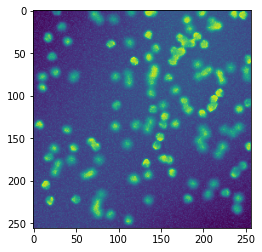

 Connected-Components :  77         LOG :  118                  DOG :  118


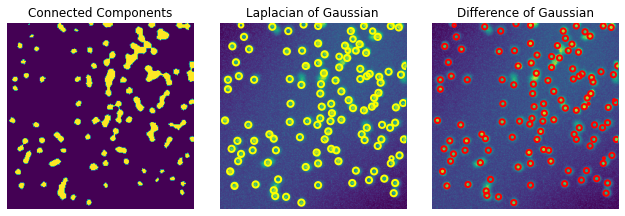

**********************************************************************


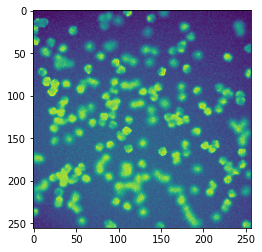

 Connected-Components :  75         LOG :  191                  DOG :  199


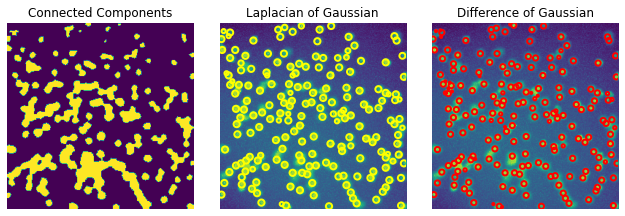

**********************************************************************


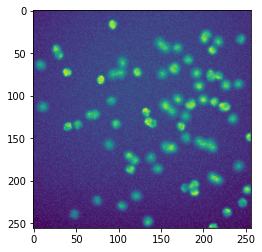

 Connected-Components :  56         LOG :  71                  DOG :  70


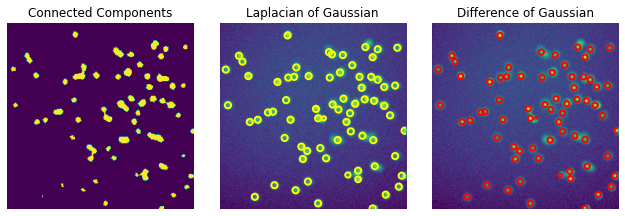

**********************************************************************


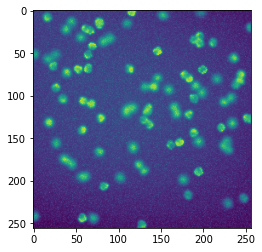

 Connected-Components :  62         LOG :  91                  DOG :  94


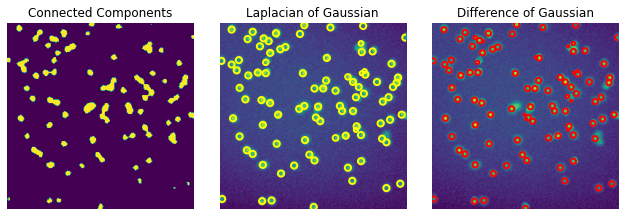

**********************************************************************


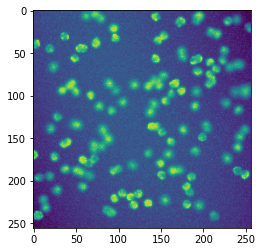

 Connected-Components :  80         LOG :  126                  DOG :  136


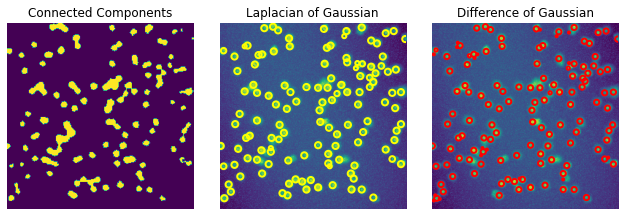

**********************************************************************


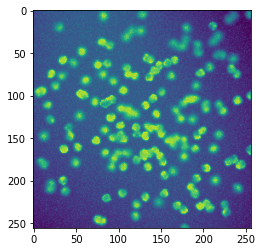

 Connected-Components :  84         LOG :  160                  DOG :  161


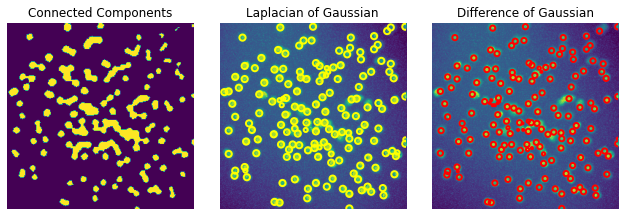

**********************************************************************


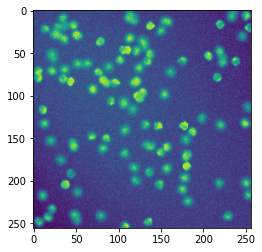

 Connected-Components :  77         LOG :  107                  DOG :  110


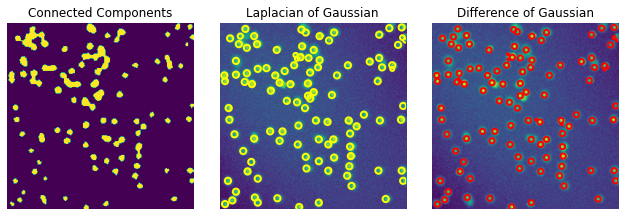

**********************************************************************


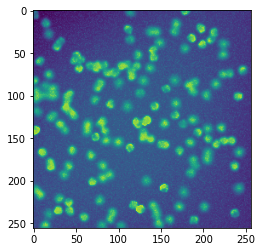

 Connected-Components :  81         LOG :  143                  DOG :  148


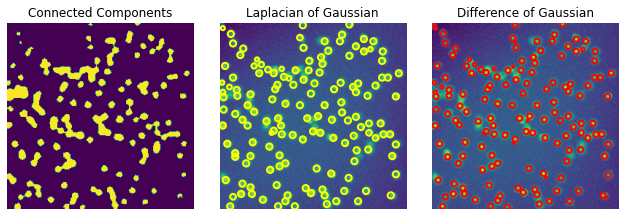

**********************************************************************


In [101]:
folder=('C:/Users/user/Desktop/Vision/final project/data')
for file in os.listdir(folder):
    image_path= os.path.join(folder ,  file)
    image = io.imread( image_path )
    image_gray = rgb2gray(image)
    plt.imshow( image_gray)
    plt.show()
    blob_detector(image_gray)

